# Flight Price Prediction

### Import all the libraries and import the datasets 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_excel('D:/project/flight price/Data_Train.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test = pd.read_excel('D:/project/flight price/Test_set.xlsx')

In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
train_copy = train.copy()
test_copy = test.copy()

In [7]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_o

Here we can see all the features are categorical except the target variable.

In [8]:
train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
4h 10m       1
36h 25m      1
42h 5m       1
19h 50m      1
3h 25m       1
Name: Duration, Length: 368, dtype: int64

The duration column interprets that the total time taken by the flight, and as this is in hours i.e. string henceforth we have to pre-process this feature.

In [9]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [11]:
train.dropna(inplace=True)

In [12]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

As we found that there are only 1 missing value in Route and Total_stops column each and volume of our dataset is so large, so we can easily drop missing values.

In [13]:
train.shape, test.shape

((10682, 11), (2671, 10))

As we see in the info of the dataset, all the columns have object data type.
Therefore, we have to convert Date_of_Journey column into timestamp so as we can use this feature for model building and prediction.

For this we use pandas **to_datetime** function.

In [14]:
train['journey_day'] = pd.to_datetime(train['Date_of_Journey'], format = "%d/%m/%Y").dt.day

In [15]:
train['journey_month'] = pd.to_datetime(train['Date_of_Journey'], format = "%d/%m/%Y").dt.month

In [16]:
train['journey_year'] = pd.to_datetime(train['Date_of_Journey'], format = "%d/%m/%Y").dt.year

Here we created as new column "journey_day" to seperate out the the day from the Date_of_Journey column.
And for this we use ***.dt.day*** method

same we will do for seperate out the month and the year from whole date and for this we use ***.dt.month*** and ***.dt.year*** method

In [17]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In above table we can see that the two new columns are created for the date, month and the year of the journey.

In [18]:
train['journey_year'].unique()

array([2019], dtype=int64)

The journey is only in one year i.e. 2019 so it will be easy to process the data as there are no other values in year column.

In [19]:
train.drop('Date_of_Journey', axis = 1, inplace= True)

In [20]:
test['journey_day'] = pd.to_datetime(test['Date_of_Journey'], format = "%d/%m/%Y").dt.day
test['journey_month'] = pd.to_datetime(test['Date_of_Journey'], format = "%d/%m/%Y").dt.month
test['journey_year'] = pd.to_datetime(test['Date_of_Journey'], format = "%d/%m/%Y").dt.year
test.drop('Date_of_Journey', axis = 1, inplace= True)

Since we have converted the Date_of_Journey column into integer and seperate the date, month and year part, now we can drop this column as it is of no use now.

Similar to Date_of_Journey column, we can do with Dep_Time and seperate out hours and minutes so that we can easily conver this categorical column to integer one.

In [21]:
train['Dep_hour'] = pd.to_datetime(train['Dep_Time']).dt.hour
train['Dep_minute'] = pd.to_datetime(train['Dep_Time']).dt.minute

In [22]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [23]:
train.drop('Dep_Time', axis = 1, inplace= True)

In [24]:
test['Dep_hour'] = pd.to_datetime(test['Dep_Time']).dt.hour
test['Dep_minute'] = pd.to_datetime(test['Dep_Time']).dt.minute
test.drop('Dep_Time', axis = 1, inplace= True)

In [25]:
## Same is the case with Arrival_Time also.

train['Arr_hour'] = pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arr_minute'] = pd.to_datetime(train['Arrival_Time']).dt.minute
train.drop('Arrival_Time', axis = 1, inplace= True)

In [26]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [27]:
test['Arr_hour'] = pd.to_datetime(test['Arrival_Time']).dt.hour
test['Arr_minute'] = pd.to_datetime(test['Arrival_Time']).dt.minute
test.drop('Arrival_Time', axis = 1, inplace= True)

In [28]:
time = list(train["Duration"])

for i in range(len(time)):
    if len(time[i].split()) != 2:    
        if "h" in time[i]:
            time[i] = time[i].strip() + " 0m"  
        else:
            time[i] = "0h " + time[i]           

Duration column is also a object data type column and we have to convert it into integer type. Basically it is the differnce betwwen Departure Time and Arrival time.

In above code we split the Duration column into the list and check its length, if length is not 2 we either added 0m or 0h to the list.


In [29]:
dur_hour = []
dur_minute = []
for i in range(len(time)):
    dur_hour.append(int(time[i].split(sep = "h")[0]))    
    dur_minute.append(int(time[i].split(sep = "m")[0].split()[-1]))   

Here we created two new lists for hour and minute and added the above seperated hours and minutes from Duration column to the new created lists.

In [30]:
train["dur_hour"] = dur_hour
train["dur_minute"] = dur_minute

Now our Duration column has been seperated to hours and minutes so we can drop the Duration column now.

In [31]:
train.drop('Duration', axis = 1, inplace= True)

In [32]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_hour,Dep_minute,Arr_hour,Arr_minute,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [33]:
time = list(test["Duration"])

for i in range(len(time)):
    if len(time[i].split()) != 2:    
        if "h" in time[i]:
            time[i] = time[i].strip() + " 0m"  
        else:
            time[i] = "0h " + time[i]           
            
dur_hour = []
dur_minute = []
for i in range(len(time)):
    dur_hour.append(int(time[i].split(sep = "h")[0]))    
    dur_minute.append(int(time[i].split(sep = "m")[0].split()[-1]))   
    
test["dur_hour"] = dur_hour
test["dur_minute"] = dur_minute
test.drop('Duration', axis = 1, inplace= True)

<Figure size 576x360 with 0 Axes>

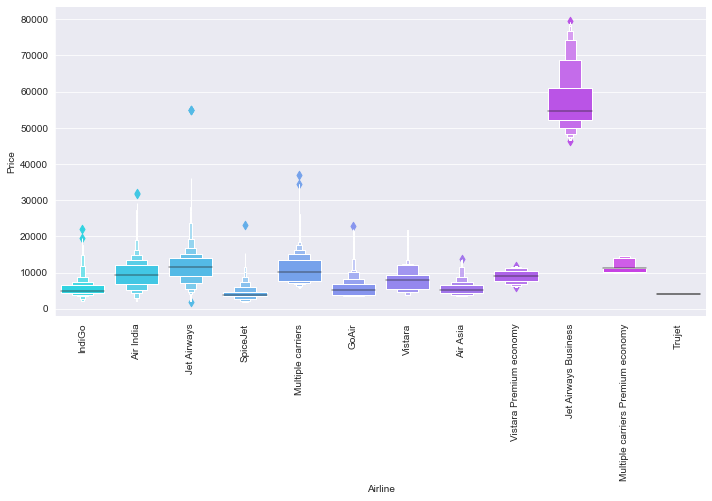

In [34]:
plt.figure(figsize=(8,5))
sns.set_style(style='darkgrid')
sns.catplot(x='Airline',y='Price',data = train, kind = 'boxen', palette= 'cool', height = 5, aspect = 2)
plt.xticks(rotation = 90)
plt.show()

In [35]:
train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

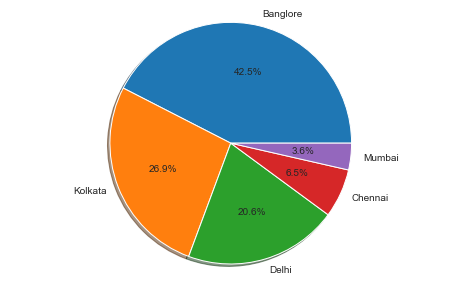

In [36]:
plt.figure(figsize=(8,5))
size = train['Source'].value_counts()
lable = train['Source'].unique()
plt.pie(x = size, labels = lable, shadow = True, autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

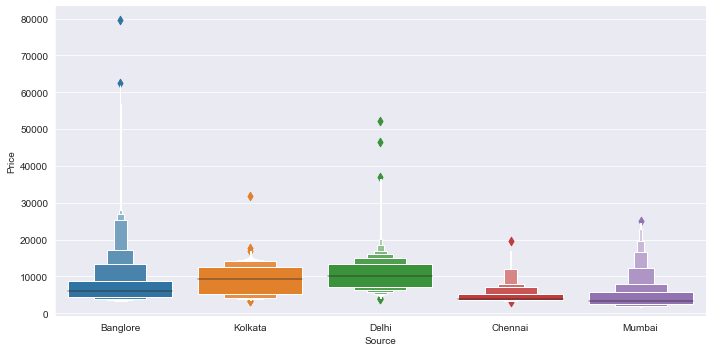

In [37]:
sns.catplot(y = "Price", x = "Source", data = train, kind="boxen", height = 5, aspect = 2)

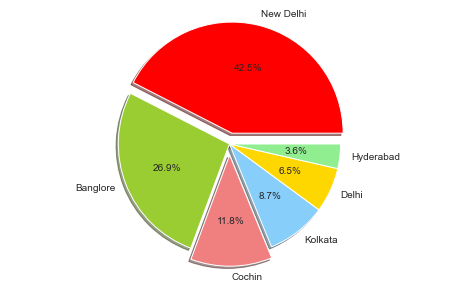

In [38]:
plt.figure(figsize=(8,5))
size = train['Destination'].value_counts()
lable = train['Destination'].unique()
color = ['red','yellowgreen','lightcoral', 'lightskyblue', 'gold', 'lightgreen']
explode = (0.1,0,0.1,0,0,0)

plt.pie(x = size, explode = explode, labels = lable, shadow = True, colors = color, autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

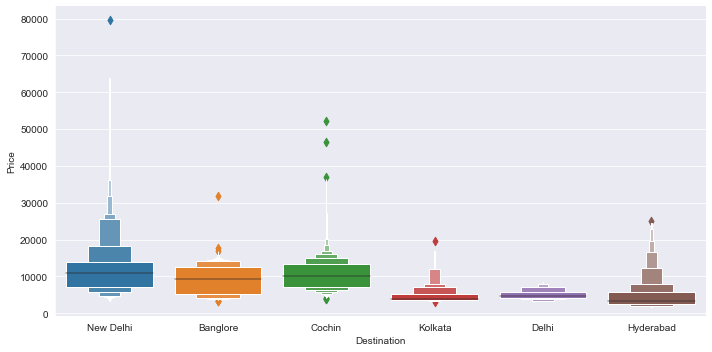

In [39]:
sns.catplot(y = "Price", x = "Destination", data = train, kind="boxen", height = 5, aspect = 2)

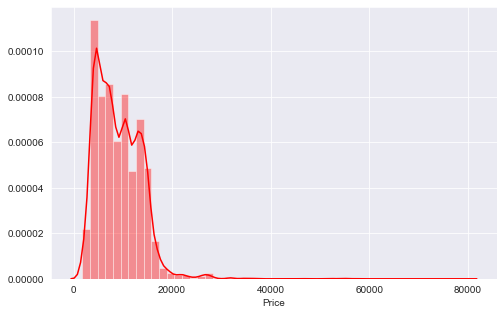

In [40]:
plt.figure(figsize = (8,5))
sns.distplot(train['Price'], color = 'red')

In [41]:
train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [42]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [43]:
train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [44]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,journey_year,Dep_hour,Dep_minute,Arr_hour,Arr_minute,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [45]:
test.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,journey_year,Dep_hour,Dep_minute,Arr_hour,Arr_minute,dur_hour,dur_minute
0,Jet Airways,Delhi,Cochin,1,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,2019,23,55,2,45,2,50


In [46]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'journey_year', 'Dep_hour',
       'Dep_minute', 'Arr_hour', 'Arr_minute', 'dur_hour', 'dur_minute'],
      dtype='object')

In [47]:
test.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'journey_day',
       'journey_month', 'journey_year', 'Dep_hour', 'Dep_minute', 'Arr_hour',
       'Arr_minute', 'dur_hour', 'dur_minute'],
      dtype='object')

In [50]:
x = train[['Airline', 'Source', 'Destination', 'Total_Stops','journey_day', 'journey_month', 'journey_year', 'Dep_hour',
           'Dep_minute', 'Arr_hour', 'Arr_minute', 'dur_hour', 'dur_minute']]

In [51]:
x.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,journey_year,Dep_hour,Dep_minute,Arr_hour,Arr_minute,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,0,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,1,3,2019,16,50,21,35,4,45


In [52]:
y = train[['Price']]

In [53]:
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


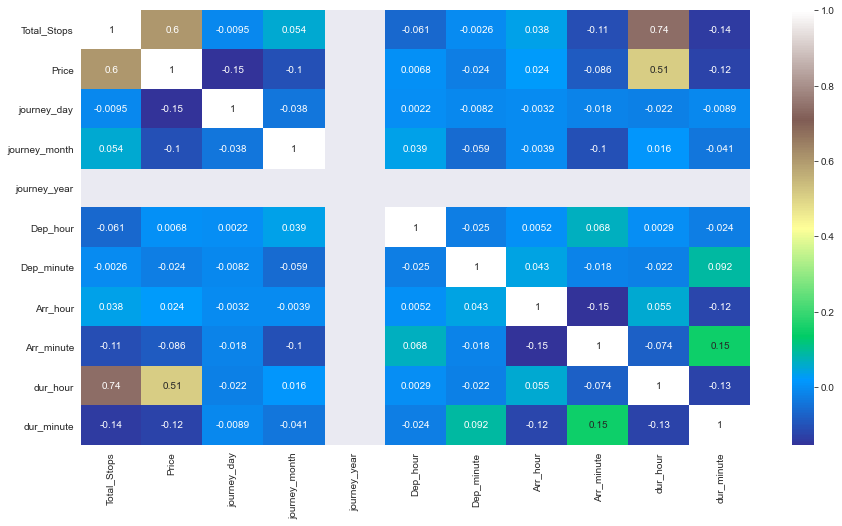

In [56]:
plt.figure(figsize = (15,8))
sns.heatmap(train.corr(), annot = True, cmap = "terrain")

In [57]:
x = pd.get_dummies(x, drop_first=True)
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [59]:
train.head()

,Total_Stops,Price,journey_day,journey_month,journey_year,Dep_hour,Dep_minute,Arr_hour,Arr_minute,dur_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [60]:
test.head()

,Total_Stops,journey_day,journey_month,journey_year,Dep_hour,Dep_minute,Arr_hour,Arr_minute,dur_hour,dur_minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,17,30,4,25,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,2019,6,20,10,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,2019,19,15,19,0,23,45,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,2019,8,0,21,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2019,23,55,2,45,2,50,...,0,0,0,0,0,0,1,0,0,0


In [61]:
x.head()

,Total_Stops,journey_day,journey_month,journey_year,Dep_hour,Dep_minute,Arr_hour,Arr_minute,dur_hour,dur_minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [63]:
train.shape, test.shape, x.shape, y.shape

((10682, 31), (2671, 29), (10682, 30), (10682, 1))

## Feature selection

In [65]:
from sklearn.ensemble import ExtraTreesRegressor
features = ExtraTreesRegressor()
features.fit(x, y)

<ipython-input-65-7de0d3c94d25>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  features.fit(x, y)


ExtraTreesRegressor()

In [66]:
print(features.feature_importances_)

[2.38031440e-01 1.44264446e-01 5.27244198e-02 0.00000000e+00
 2.39972484e-02 2.10260355e-02 2.77337024e-02 1.86880593e-02
 1.22825858e-01 1.81015402e-02 9.16117856e-03 2.31581845e-03
 2.00265699e-02 1.26807499e-01 6.70909729e-02 1.78612257e-02
 7.83438329e-04 3.63673459e-03 1.21164342e-04 4.78033713e-03
 8.94539222e-05 4.98278616e-04 1.27281077e-02 3.18635896e-03
 6.71891549e-03 1.14109381e-02 1.37842791e-02 6.02918327e-03
 4.71267845e-04 2.51055293e-02]


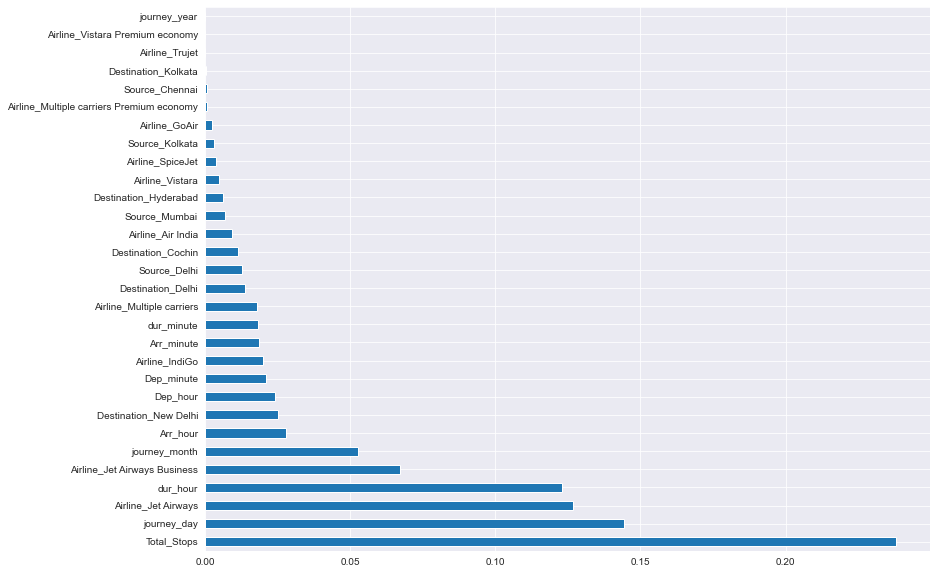

In [76]:
plt.figure(figsize = (13,10))
feat_importance = pd.Series(features.feature_importances_, index=x.columns)
feat_importance.nlargest(30).plot(kind='barh')
plt.show()

## Random Forest Regressor 

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [78]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor()
random_model.fit(x_train, y_train)

<ipython-input-78-3aa9c3b7556e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_model.fit(x_train, y_train)


RandomForestRegressor()

In [79]:
y_pred = random_model.predict(x_test)

In [80]:
random_model.score(x_train, y_train)

0.955227498780863

In [81]:
random_model.score(x_test, y_test)

0.8025361791529939

In [152]:
from sklearn import metrics
print('Mean squared error is {}:'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Square value is {}:'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R-square value is {}:'.format(r2_score(y_test, y_pred)))

Mean squared error is 4028444.911172277:
Root Mean Square value is 2007.0986301555479:
R-square value is 0.8025361791529939:


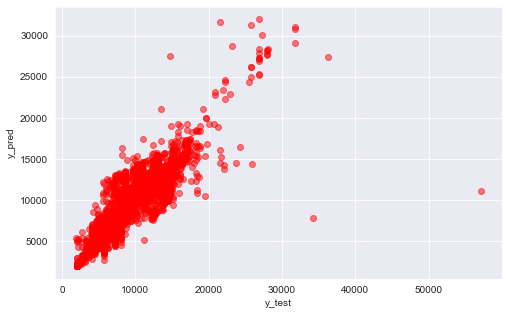

In [92]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha = 0.5, color  = 'red')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot()
plt.show()

### Hyperparameter Tunning in Random Forest

In [124]:
#Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [125]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [127]:
random_hyper = RandomizedSearchCV(estimator = random_model, param_distributions = random_grid,scoring='neg_mean_squared_error',
                                  n_iter = 10, cv = 5, random_state=42, n_jobs = 1)
random_hyper.fit(x_train,y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [129]:
random_hyper.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [130]:
pred_hyper = random_hyper.predict(x_test)

Text(0, 0.5, 'y_pred')

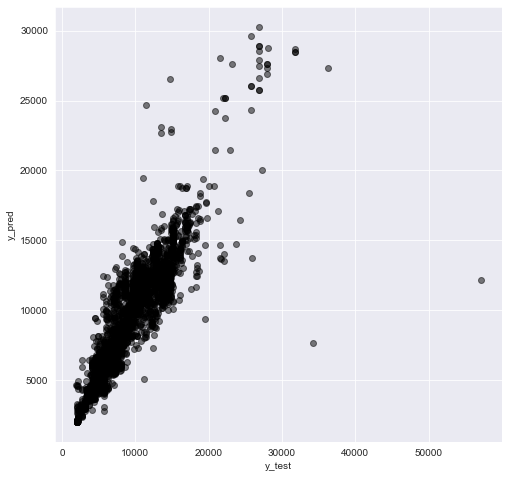

In [139]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, pred_hyper, alpha = 0.5, color = 'black')
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [150]:
from sklearn import metrics
print('Mean squared error is {}:'.format(metrics.mean_squared_error(y_test, pred_hyper)))
print('Root Mean Square value is {}:'.format(np.sqrt(metrics.mean_squared_error(y_test, pred_hyper))))
print('R-square value is {}:'.format(r2_score(y_test, pred_hyper)))

MAE: 1164.0385655684445
Mean squared error is 3759816.738434153:
Root Mean Square value is 1939.024687422559:
R-square value is 0.8157036287633657:


In [158]:
import pickle
file = open('random_forest.pkl', 'wb')
pickle.dump(random_model, file)